<a href="https://colab.research.google.com/github/DFelton88/Python-Coding/blob/master/ML3Assign_MoreNashvilleHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML3Assign: Explore More Details of Housing in Nashville/Davidson County

In [ ]:
# Acquire the Nashville Housing Data from my GitHub repository
! git clone https://github.com/gacree/NashvilleHousing.git

fatal: destination path 'NashvilleHousing' already exists and is not an empty directory.


### This evening, we will continue our exploration with Housing Data from Nashville/Davidson County.

* In ML3_MoreNashvilleHousing we introduced 2 new functions .groupby(), 
.agg(), ... and the addition of a new scatterplot visualization. We focused on the CouncilDistrict column and introduced the ACS data set which gave a view of median income for these areas. 

* We will now turn our focus back to AddressCities and use .groupby() to create new columns in a dataframe we will call explore_housing_2017.

* Finally, we will create a scatter plot to consider the relationship between the Percentage of Affordable Houses in each AddressCity ... and the Median Cost Per Square Foot.

Import packages, read data into dataframes, reassign column names



In [ ]:
#import the pandas package for data analytics
# and matplotlib for visualizations
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data files into pandas dataframes .
# Notice that we must indicate the full path of the data file.
houses_2017 = pd.read_csv('NashvilleHousing/2017SINGLEFAMILYSF.txt')

# Alter the column names in each of the new dataframes
houses_2017.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']

houses_2017.sample(5)

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
77582,093110C00700CO,USD,19,602 2ND AVE S,NASHVILLE,37210,42000,131900,173900,43475,574.60004
9029,04105002100,GSD,3,4171 CREEK TRAIL DR,WHITES CREEK,37189,62200,285400,347600,86900,3630.00000
143590,142070C03600CO,GSD,22,401 BRADFORD GRN,NASHVILLE,37221,38200,134000,172200,43050,1350.00000
148456,14512001100,OH,34,1026 NORFLEET DR,NASHVILLE,37220,269500,395700,665200,166300,2458.00000
104869,11400013300,GSD,22,740 OLD HICKORY BLVD,NASHVILLE,37209,56000,100000,156000,39000,1217.00000


Let's take care of some preliminaries from our work last week:
* Create a dataframe of affordable houses entitled afford_houses_2017
* Find the number of houses in each AddressCity
* Find the number of affordable houses in each AddressCity
* Create a dataframe with these two columns called explore_housing_2017

In [ ]:
# 1
# Create afford_houses_2017
# With TOTAPPR between 150000 and 200000 and 
# FinishedArea at least 1800
afford_houses_2017 = houses_2017[(houses_2017['TOTALAPPR']>= 150000)
                                 & (houses_2017['TOTALAPPR']<= 200000)
                                 & (houses_2017['FinishedArea']>= 1800)]

# Find the number of houses in each AddressCity
# and give this data a name ... housesCount
housesCount = houses_2017['AddressCity'].value_counts()

# Find the number of affordable houses in each AddressCity
# and give this data a name ... affordHousesCount
affordHousesCount = afford_houses_2017['AddressCity'].value_counts()

# Create a dataframe with the two pieces of data
# we gathered above
explore_housing_2017 = pd.DataFrame({'HousesCount': housesCount, 
                                     'AffordHousesCount': affordHousesCount})

# Let's view this new dataframe
explore_housing_2017

,HousesCount,AffordHousesCount
ANTIOCH,22770,3191.0
ASHLAND CITY,157,8.0
BELLEVUE,2,NaN
BRENTWOOD,4983,2.0
FRANKLIN,26,NaN
GOODLETTSVILLE,4422,407.0
HERMITAGE,10894,825.0
JOELTON,1506,97.0
LAVERGNE,3,NaN
MADISON,9771,681.0


### We can add columns to our dataframe by simply naming them and assigning values to each row. For instance, explore_housing_2017['NewColumn'] = 0 would create a third column in explore_housing_2017 called 'NewColumn' in which every entry is 0.

 Let's instead, create a more useful new column called 'AffordPct' that will list the percentage of houses in each AddressCity that are affordable (as we have defined it).  We can simply take the entries of the second row and divide each of them by the respective entry in the first row. We will then multiply the result by 100 to get a value between 0 and 100.

In [ ]:
# 2
# Create a new column in the explore_housing_2017 dataframe entitled 'AffordPct'
# and set all the values equal to 0.
explore_housing_2017['AffordPct'] = 0

# View the dataframe
explore_housing_2017

,HousesCount,AffordHousesCount,AffordPct
ANTIOCH,22770,3191.0,0
ASHLAND CITY,157,8.0,0
BELLEVUE,2,NaN,0
BRENTWOOD,4983,2.0,0
FRANKLIN,26,NaN,0
GOODLETTSVILLE,4422,407.0,0
HERMITAGE,10894,825.0,0
JOELTON,1506,97.0,0
LAVERGNE,3,NaN,0
MADISON,9771,681.0,0


In [ ]:
# 3
# Redefine the 'AffordPct' column so that each entry is the entry in the second column 
# divided by the respective entry in the 1st column.
# Multiply the result by 100 to change it to a percentage.
explore_housing_2017['AffordPct'] = (explore_housing_2017['AffordHousesCount']
                                     /explore_housing_2017['HousesCount'])*100

# View the dataframe
explore_housing_2017

,HousesCount,AffordHousesCount,AffordPct,MedianAppraisal,MedianFinishedArea,MedianCostPerSqFt
ANTIOCH,22770,3191.0,14.014054,NaN,0,NaN
ASHLAND CITY,157,8.0,5.095541,NaN,0,NaN
BELLEVUE,2,NaN,NaN,NaN,0,NaN
BRENTWOOD,4983,2.0,0.040136,NaN,0,NaN
FRANKLIN,26,NaN,NaN,NaN,0,NaN
GOODLETTSVILLE,4422,407.0,9.203980,NaN,0,NaN
HERMITAGE,10894,825.0,7.572976,NaN,0,NaN
JOELTON,1506,97.0,6.440903,NaN,0,NaN
LAVERGNE,3,NaN,NaN,NaN,0,NaN
MADISON,9771,681.0,6.969604,NaN,0,NaN


Let's use groupby to create 3 more columns for explore_housing_2017.
* explore_housing_2017['MedianAppraisal'] will list the median of the TOTALAPPR values for each AddressCity in houses_2017
* explore_housing_2017['MedianFinishedArea'] will list the median FinishedArea for each AddressCity in houses_2017
* explore_housing_2017['MedianCostPerSqFt'] will list the ratio of the previous two column values

In [ ]:
# 4
# Using .groupby() create a column entitled 'MedianAppraisal' 
# which lists the median of the TOTALAPPR for each AddressCity
# in houses_2017 
explore_housing_2017['MedianAppraisal'] = houses_2017.groupby(houses_2017['AddressCity'])['TOTALAPPR'].median()

# View the dataframe
explore_housing_2017

,HousesCount,AffordHousesCount,AffordPct,MedianAppraisal,MedianFinishedArea,MedianCostPerSqFt
ANTIOCH,22770,3191.0,14.014054,166600,1650.000000,NaN
ASHLAND CITY,157,8.0,5.095541,146200,1350.000000,NaN
BELLEVUE,2,NaN,NaN,248150,1807.000000,NaN
BRENTWOOD,4983,2.0,0.040136,357000,2455.000000,NaN
FRANKLIN,26,NaN,NaN,420850,2459.550050,NaN
GOODLETTSVILLE,4422,407.0,9.203980,185550,1725.000000,NaN
HERMITAGE,10894,825.0,7.572976,179750,1721.000000,NaN
JOELTON,1506,97.0,6.440903,202050,1735.500000,NaN
LAVERGNE,3,NaN,NaN,228100,1242.000000,NaN
MADISON,9771,681.0,6.969604,147500,1356.000000,NaN


In [ ]:
# 5
# Using .groupby() create a column entitled 'MedianFinishedArea' 
# which lists the median of the FinishedArea for each AddressCity
# in houses_2017 

# Use the previous cell as a model!!!
explore_housing_2017['MedianFinishedArea'] = houses_2017.groupby(houses_2017['AddressCity'])['FinishedArea'].median()

# View the dataframe
explore_housing_2017

,HousesCount,AffordHousesCount,AffordPct,MedianAppraisal,MedianFinishedArea,MedianCostPerSqFt
ANTIOCH,22770,3191.0,14.014054,22770,1650.000000,NaN
ASHLAND CITY,157,8.0,5.095541,157,1350.000000,NaN
BELLEVUE,2,NaN,NaN,2,1807.000000,NaN
BRENTWOOD,4983,2.0,0.040136,4983,2455.000000,NaN
FRANKLIN,26,NaN,NaN,26,2459.550050,NaN
GOODLETTSVILLE,4422,407.0,9.203980,4422,1725.000000,NaN
HERMITAGE,10894,825.0,7.572976,10894,1721.000000,NaN
JOELTON,1506,97.0,6.440903,1506,1735.500000,NaN
LAVERGNE,3,NaN,NaN,3,1242.000000,NaN
MADISON,9771,681.0,6.969604,9771,1356.000000,NaN


In [ ]:
# 6
# Create a column entitled 'MedianCostPerSqFt' 
# which lists the ratio of the two previously defined columns for each AddressCity
explore_housing_2017['MedianCostPerSqFt'] = explore_housing_2017['MedianAppraisal']/explore_housing_2017['MedianFinishedArea']

# View the dataframe
explore_housing_2017

,HousesCount,AffordHousesCount,AffordPct,MedianAppraisal,MedianFinishedArea,MedianCostPerSqFt
ANTIOCH,22770,3191.0,14.014054,166600,1650.000000,100.969697
ASHLAND CITY,157,8.0,5.095541,146200,1350.000000,108.296296
BELLEVUE,2,NaN,NaN,248150,1807.000000,137.327061
BRENTWOOD,4983,2.0,0.040136,357000,2455.000000,145.417515
FRANKLIN,26,NaN,NaN,420850,2459.550050,171.108533
GOODLETTSVILLE,4422,407.0,9.203980,185550,1725.000000,107.565217
HERMITAGE,10894,825.0,7.572976,179750,1721.000000,104.445090
JOELTON,1506,97.0,6.440903,202050,1735.500000,116.421780
LAVERGNE,3,NaN,NaN,228100,1242.000000,183.655395
MADISON,9771,681.0,6.969604,147500,1356.000000,108.775811


We can compare two metrics on the same plot by creating a scatter plot.

Text(0, 0.5, 'Median Cost Per Sq Ft')

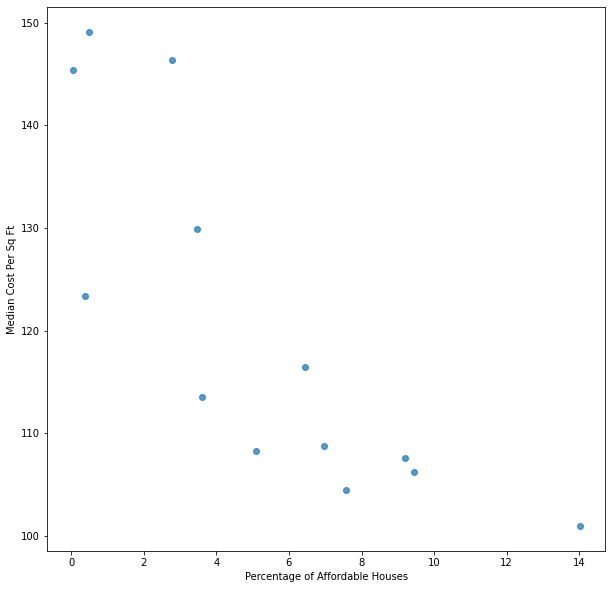

In [ ]:
# 7
# Below we will examine the relationship between the Percentage of Affordable Houses in 2017 and
# the Median Cost Per Sq Ft of properties in 2017 for each AddressCity
# Notice that we must define an x coordinate (for the horizontal axis)
# and a y coordinate (for the vertical axis).

fig = plt.subplots(figsize = (10,10))

plt.scatter(x = explore_housing_2017['AffordPct'], 
         y = explore_housing_2017['MedianCostPerSqFt'],
           alpha = 0.75)

plt.xlabel('Percentage of Affordable Houses')
plt.ylabel('Median Cost Per Sq Ft')

'# 8'

Can you describe the relationship between Percentage of Affordable House and Median Cost Per Sq Ft Value?

### Our plot would be a lot more useful if we knew which district corresponded to each point. 

To add our labels, we can use the matplotlib `annotate` function. We need to specify the text that we want (using the `s` parameter) and where we want to place the text (using the `xy` parameter).

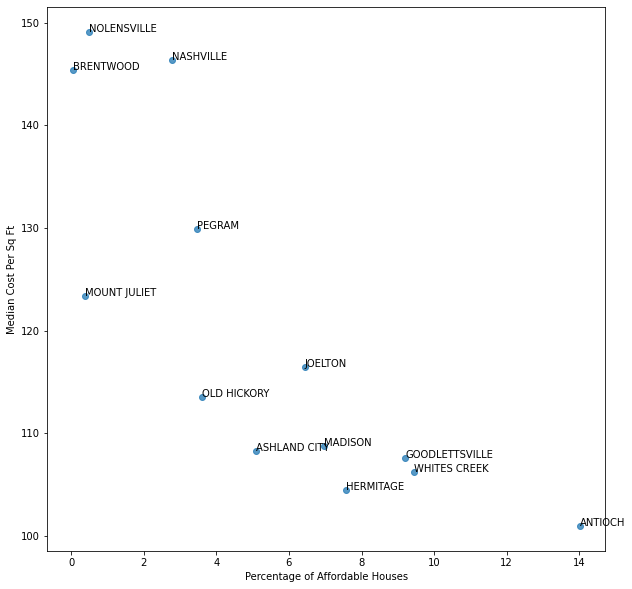

In [ ]:
# 9
# Below we will examine the relationship between the Percentage of Affordable Houses in 2017 and
# the Median Cost Per Sq Ft of properties in 2017 for each AddressCity
# Notice that we will add annotations in the form of the AddressCity name
# for each point in the scatter plot.

fig = plt.subplots(figsize = (10,10))

plt.scatter(x = explore_housing_2017['AffordPct'], 
         y = explore_housing_2017['MedianCostPerSqFt'],
           alpha = 0.75)

plt.xlabel('Percentage of Affordable Houses')
plt.ylabel('Median Cost Per Sq Ft')
for i in range(0,16):
    plt.annotate(xy = (explore_housing_2017['AffordPct'][i], explore_housing_2017['MedianCostPerSqFt'][i]),
                s = explore_housing_2017.index[i]);

'# 10'
### Based upon the previous scatter plot, which AddressCities look like they might be worth exploring. Give a brief explanation below.


...

### A few more exercises to reinforce our understanding of .groupby() and .agg()

In [ ]:
# 11
# Use .groupby() and .agg() to view the max and min values 
# of FinishedArea for each AddressCity.
houses_2017.groupby(['AddressCity'])['FinishedArea'].agg(['min','max']).head(10)

,min,max
AddressCity,,
ANTIOCH,0.0,9922.00000
ASHLAND CITY,384.0,4200.00000
BELLEVUE,1792.0,1822.00000
BRENTWOOD,0.0,14199.00000
FRANKLIN,0.0,5551.00000
GOODLETTSVILLE,0.0,12326.00000
HERMITAGE,0.0,40417.00000
JOELTON,0.0,19034.00000
LAVERGNE,775.0,1568.00000


In [ ]:
# 12
# Use .groupby() and .agg() to view the max and min values 
# of LAND, IMPR, and FinishedArea for each AddressCity.
houses_2017.groupby(['AddressCity'])[['FinishedArea','LAND','IMPR']].agg(['max','min']).head(10)

FinishedArea             LAND             IMPR        
                        max     min      max     min      max     min
AddressCity                                                          
ANTIOCH          9922.00000     0.0  1488700    7300  1518000       0
ASHLAND CITY     4200.00000   384.0   168500   14600   471100    3700
BELLEVUE         1822.00000  1792.0    45600   43200   231200  176300
BRENTWOOD       14199.00000     0.0  1421800   32000  3183200       0
FRANKLIN         5551.00000     0.0   234300   37000   562700       0
GOODLETTSVILLE  12326.00000     0.0   729700   13500  1500800       0
HERMITAGE       40417.00000     0.0  1250400   12000  2172200       0
JOELTON         19034.00000     0.0   309200    1500  1025200       0
LAVERGNE         1568.00000   775.0   339600  129400    80400    7600
MADISON         10367.95996     0.0   334500    4000  1098400       0

In [ ]:
# 13
# Use .groupby() and .agg() to view the max and min values 
# of FinishedArea for each DistrictCode within each AddressCity.
houses_2017.groupby(['AddressCity','DistrictCode'])['FinishedArea'].agg(['max','min']).head(25)

max     min
AddressCity    DistrictCode                     
ANTIOCH        GSD            8693.00000     0.0
               USD            9922.00000     0.0
ASHLAND CITY   GSD            4200.00000   384.0
BELLEVUE       GSD            1822.00000  1792.0
BRENTWOOD      FH            12423.00000  1635.0
               GSD           14199.00000     0.0
               OH            13113.40039     0.0
               USD           10283.00000     0.0
FRANKLIN       GSD            5551.00000     0.0
GOODLETTSVILLE GO             8996.79980     0.0
               GSD           12326.00000     0.0
               RT             4252.50000   736.0
HERMITAGE      GSD           40417.00000     0.0
JOELTON        GSD           19034.00000     0.0
LAVERGNE       USD            1568.00000   775.0
MADISON        GO             2556.00000   900.0
               GSD           10367.95996     0.0
               USD            9794.00000     0.0
MOUNT JULIET   GSD            6237.10010   480.0
NASHVILLE      BH             2574.55005   418.0
               BM            21014.50000     0.0
               CBID          21242.00000     0.0
               FH            20868.00000     0.0
               GBID           3829.00000   420.0
               GSD           12893.59961     0.0